In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.utils.multiclass import unique_labels
# import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

import plotly.express as px

#os.chdir(r'N:\STOCK ADVISOR BOT')

In [2]:

def prepare_lagged_features(df_Stock, lag_stock =20, lag_index =5):

        print('Preparing Lagged Features for Stock, Index Funds.....')
        lags = range(1, lag_stock+1)
        lag_cols= ['Close']
        df_Stock=df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

       
        lags = range(1, lag_index+1)
        lag_cols= ['QQQ_Close','SnP_Close','DJIA_Close']
        df_Stock= df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

        df_Stock = df_Stock.drop(columns=lag_cols)


        remove_lags_na = max(lag_stock, lag_index) + 1
        print('Removing NAN rows - ', str(remove_lags_na))
        df_Stock = df_Stock.iloc[remove_lags_na:,]
        return df_Stock

    
    
def get_mape(y_true, y_pred): 
        """
        Compute mean absolute percentage error (MAPE)
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

'''
for i in range(4):
    print(i)
    #name='v'+str(i)
    locals()['v'+str(i)]=i+i
    print(locals()['v'+str(i)])
'''


"\nfor i in range(4):\n    print(i)\n    #name='v'+str(i)\n    locals()['v'+str(i)]=i+i\n    print(locals()['v'+str(i)])\n"

# Buy and Hold

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_141 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 20s - loss: 0.0036
Epoch 2/25
494/494 - 17s - loss: 0.0013
Epoch 3/25
494/494 - 17s - loss: 0.0014
Epoch 4/25
494/494 - 17s - loss: 0.0015
Epoch 5/25
494/494 - 18s - loss: 0.0014
Epoch 6/25
494/494 - 16s - loss: 0.0012
Epoch 7/25
494/494 - 17s - loss: 0.0011
Epoch 8/25

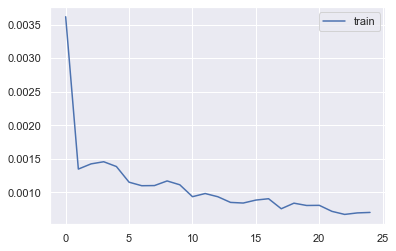

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_143 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 22s - loss: 0.0067
Epoch 2/25
494/494 - 16s - loss: 0.0035
Epoch 3/25
494/494 - 16s - loss: 0.0033
Epoch 4/25
494/494 - 15s - loss: 0.0030
Epoch 5/25
494/494 - 16s - loss: 0.0029
Epoch 6/25
494/494 - 15s - loss: 0.0029
Epoch 7/25
494/494 - 15s - loss: 0.0025
Epoch 8/25

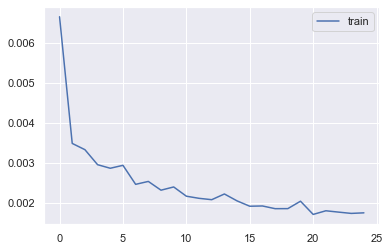

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_145 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0086
Epoch 2/25
494/494 - 15s - loss: 0.0043
Epoch 3/25
494/494 - 15s - loss: 0.0041
Epoch 4/25
494/494 - 15s - loss: 0.0038
Epoch 5/25
494/494 - 16s - loss: 0.0039
Epoch 6/25
494/494 - 15s - loss: 0.0035
Epoch 7/25
494/494 - 15s - loss: 0.0036
Epoch 8/25


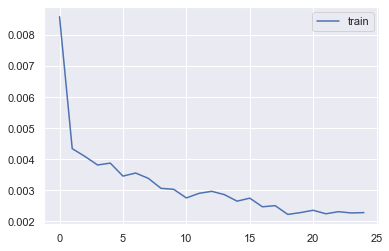

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_147 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0102
Epoch 2/25
494/494 - 15s - loss: 0.0025
Epoch 3/25
494/494 - 16s - loss: 0.0021
Epoch 4/25
494/494 - 16s - loss: 0.0022
Epoch 5/25
494/494 - 16s - loss: 0.0021
Epoch 6/25
494/494 - 16s - loss: 0.0020
Epoch 7/25
494/494 - 15s - loss: 0.0019
Epoch 8/25
4

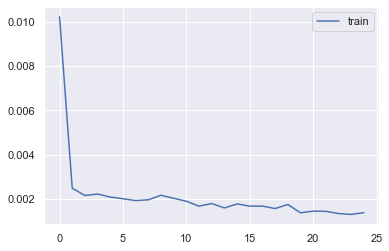

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_148 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_149 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 21s - loss: 0.0083
Epoch 2/25
494/494 - 16s - loss: 0.0050
Epoch 3/25
494/494 - 15s - loss: 0.0044
Epoch 4/25
494/494 - 15s - loss: 0.0042
Epoch 5/25
494/494 - 16s - loss: 0.0048
Epoch 6/25
494/494 - 16s - loss: 0.0044
Epoch 7/25
494/494 - 15s - loss: 0.0040
Epoch 8/25

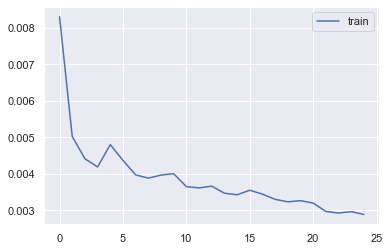

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_151 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0053
Epoch 2/25
494/494 - 18s - loss: 0.0028
Epoch 3/25
494/494 - 17s - loss: 0.0022
Epoch 4/25
494/494 - 17s - loss: 0.0025
Epoch 5/25
494/494 - 18s - loss: 0.0020
Epoch 6/25
494/494 - 18s - loss: 0.0020
Epoch 7/25
494/494 - 17s - loss: 0.0020
Epoch 8/25

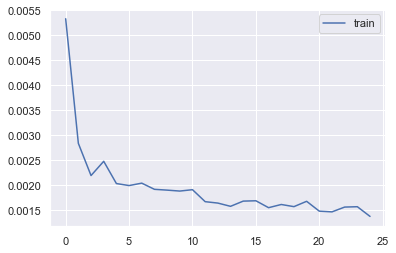

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_153 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 20s - loss: 0.0061
Epoch 2/25
494/494 - 16s - loss: 0.0024
Epoch 3/25
494/494 - 17s - loss: 0.0024
Epoch 4/25
494/494 - 16s - loss: 0.0024
Epoch 5/25
494/494 - 18s - loss: 0.0021
Epoch 6/25
494/494 - 16s - loss: 0.0023
Epoch 7/25
494/494 - 16s - loss: 0.0019
Epoch 8/25

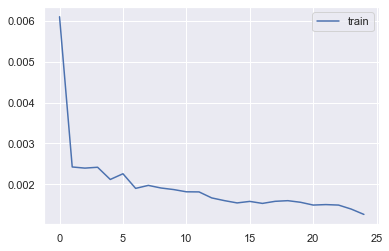

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_155 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 21s - loss: 0.0080
Epoch 2/25
494/494 - 17s - loss: 0.0026
Epoch 3/25
494/494 - 17s - loss: 0.0020
Epoch 4/25
494/494 - 18s - loss: 0.0020
Epoch 5/25
494/494 - 17s - loss: 0.0016
Epoch 6/25
494/494 - 16s - loss: 0.0017
Epoch 7/25
494/494 - 17s - loss: 0.0016
Epoch 8/25

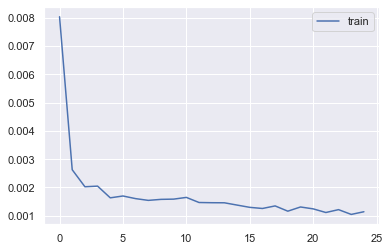

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_157 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0072
Epoch 2/25
494/494 - 15s - loss: 0.0035
Epoch 3/25
494/494 - 15s - loss: 0.0032
Epoch 4/25
494/494 - 15s - loss: 0.0031
Epoch 5/25
494/494 - 15s - loss: 0.0029
Epoch 6/25
494/494 - 15s - loss: 0.0029
Epoch 7/25
494/494 - 15s - loss: 0.0028
Epoch 8/25

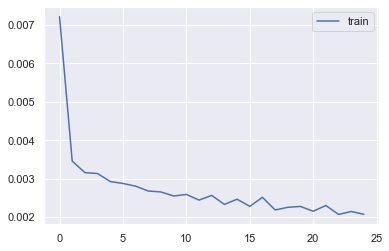

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_158 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_159 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0063
Epoch 2/25
494/494 - 15s - loss: 0.0023
Epoch 3/25
494/494 - 15s - loss: 0.0020
Epoch 4/25
494/494 - 15s - loss: 0.0021
Epoch 5/25
494/494 - 16s - loss: 0.0020
Epoch 6/25
494/494 - 16s - loss: 0.0021
Epoch 7/25
494/494 - 15s - loss: 0.0019
Epoch 8/25

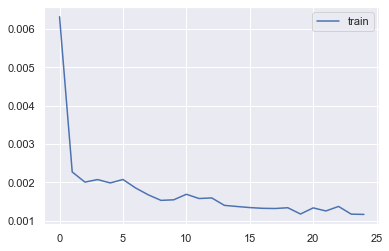

In [229]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [236]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred1 = EfficientFrontier(mu, Sigma)
    ef_pred1.efficient_return(i)
    vol_ef.append(ef_pred1.portfolio_performance()[1])

ef_pred1 = EfficientFrontier(mu, Sigma)
ef_pred1.min_volatility()
min_vol_ret = ef_pred1.portfolio_performance()[0]
min_vol_vol = ef_pred1.portfolio_performance()[1]

ef_pred1.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred1.portfolio_performance()[0]
max_sharpe_vol = ef_pred1.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)





Expected annual return: 4.1%
Annual volatility: 4.9%
Sharpe Ratio: 0.65


(0.040861540355307896, 0.04919120345762832, 0.6477080883526741)

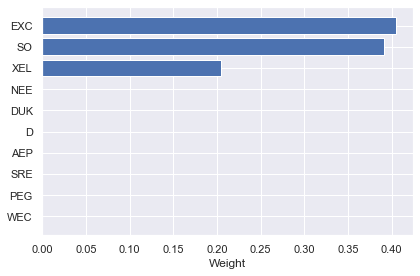

In [237]:

ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred1 = ef_pred1.min_volatility()

plot_weights(raw_weights_minvar_exp_pred1)
ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 43.1%
Annual volatility: 11.7%
Sharpe Ratio: 3.60


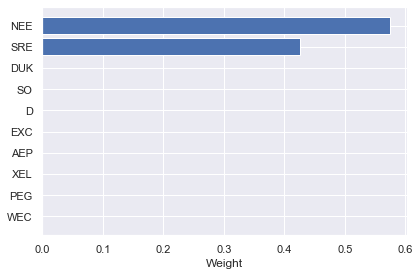

In [239]:
ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred1.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred1,AV1_Pred1,SR1_Pred1=ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [240]:
Weight_Pred1= raw_weights_maxsharpe_exp.values()

LISTValue_Pred1= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred1 = pd.DataFrame(hhhhh.T,columns = ['per_Pred1'])


In [241]:
PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred1 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred1'])


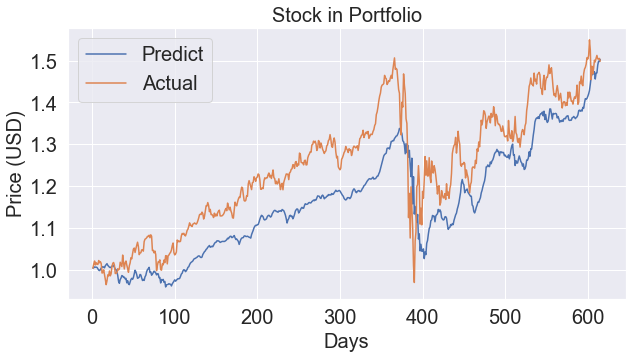

In [117]:
#---------------------------------------------------------------------------------------------#
plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(per_Pred1['per_Pred1'])

plt.plot(perreal_Pred1['PerReal_Pred1'])


plt.legend(['Predict','Actual'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

# Period1

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_21 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0038
Epoch 2/25
494/494 - 14s - loss: 0.0017
Epoch 3/25
494/494 - 16s - loss: 0.0015
Epoch 4/25
494/494 - 18s - loss: 0.0013
Epoch 5/25
494/494 - 15s - loss: 0.0012
Epoch 6/25
494/494 - 14s - loss: 0.0012
Epoch 7/25
494/494 - 14s - loss: 0.0014
Epoch 8/25

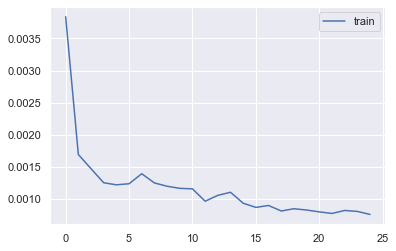

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_23 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0072
Epoch 2/25
494/494 - 14s - loss: 0.0038
Epoch 3/25
494/494 - 14s - loss: 0.0032
Epoch 4/25
494/494 - 15s - loss: 0.0028
Epoch 5/25
494/494 - 14s - loss: 0.0029
Epoch 6/25
494/494 - 14s - loss: 0.0029
Epoch 7/25
494/494 - 14s - loss: 0.0026
Epoch 8/25

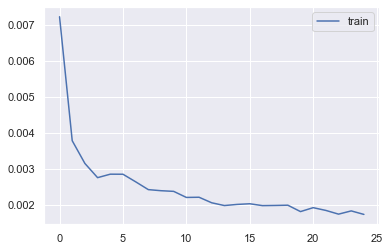

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_25 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0121
Epoch 2/25
494/494 - 14s - loss: 0.0042
Epoch 3/25
494/494 - 14s - loss: 0.0043
Epoch 4/25
494/494 - 14s - loss: 0.0038
Epoch 5/25
494/494 - 14s - loss: 0.0035
Epoch 6/25
494/494 - 14s - loss: 0.0035
Epoch 7/25
494/494 - 14s - loss: 0.0037
Epoch 8/25


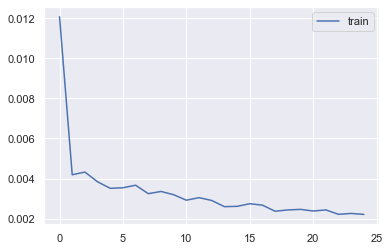

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_27 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0084
Epoch 2/25
494/494 - 14s - loss: 0.0023
Epoch 3/25
494/494 - 15s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0022
Epoch 5/25
494/494 - 14s - loss: 0.0021
Epoch 6/25
494/494 - 14s - loss: 0.0023
Epoch 7/25
494/494 - 14s - loss: 0.0019
Epoch 8/25
4

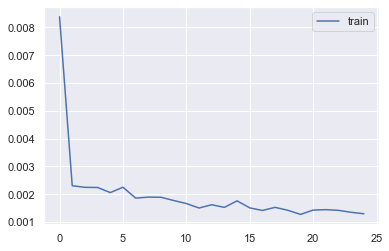

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_29 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0078
Epoch 2/25
494/494 - 14s - loss: 0.0049
Epoch 3/25
494/494 - 14s - loss: 0.0048
Epoch 4/25
494/494 - 15s - loss: 0.0044
Epoch 5/25
494/494 - 14s - loss: 0.0045
Epoch 6/25
494/494 - 14s - loss: 0.0040
Epoch 7/25
494/494 - 14s - loss: 0.0039
Epoch 8/25

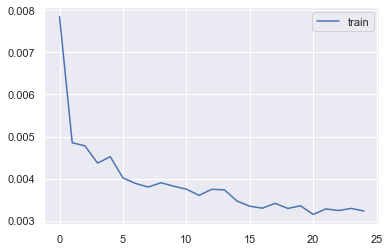

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_31 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0071
Epoch 2/25
494/494 - 17s - loss: 0.0028
Epoch 3/25
494/494 - 14s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0021
Epoch 5/25
494/494 - 14s - loss: 0.0021
Epoch 6/25
494/494 - 14s - loss: 0.0021
Epoch 7/25
494/494 - 14s - loss: 0.0020
Epoch 8/25

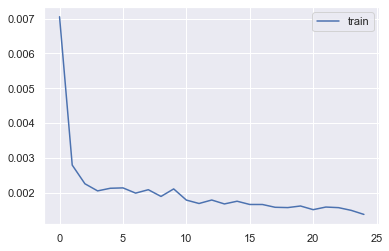

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_33 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0089
Epoch 2/25
494/494 - 15s - loss: 0.0023
Epoch 3/25
494/494 - 14s - loss: 0.0024
Epoch 4/25
494/494 - 17s - loss: 0.0022
Epoch 5/25
494/494 - 16s - loss: 0.0021
Epoch 6/25
494/494 - 16s - loss: 0.0023
Epoch 7/25
494/494 - 15s - loss: 0.0020
Epoch 8/25

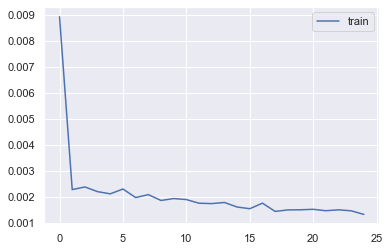

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_35 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0057
Epoch 2/25
494/494 - 14s - loss: 0.0021
Epoch 3/25
494/494 - 14s - loss: 0.0019
Epoch 4/25
494/494 - 14s - loss: 0.0019
Epoch 5/25
494/494 - 14s - loss: 0.0015
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0016
Epoch 8/25

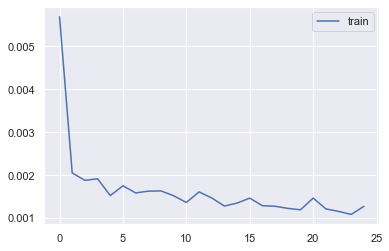

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_37 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0070
Epoch 2/25
494/494 - 14s - loss: 0.0039
Epoch 3/25
494/494 - 14s - loss: 0.0032
Epoch 4/25
494/494 - 14s - loss: 0.0033
Epoch 5/25
494/494 - 14s - loss: 0.0028
Epoch 6/25
494/494 - 14s - loss: 0.0033
Epoch 7/25
494/494 - 14s - loss: 0.0028
Epoch 8/25

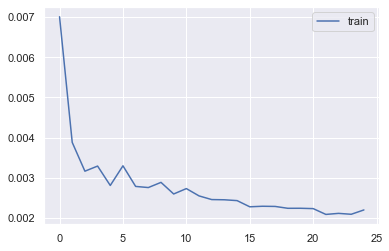

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_39 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0058
Epoch 2/25
494/494 - 14s - loss: 0.0028
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0021
Epoch 5/25
494/494 - 14s - loss: 0.0020
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0017
Epoch 8/25

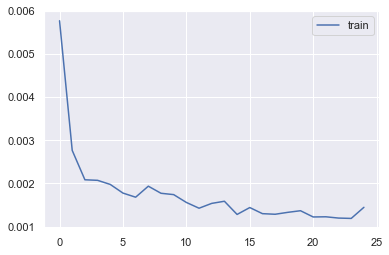

In [118]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:L+100,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:L+100,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [119]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred2 = EfficientFrontier(mu, Sigma)
    ef_Pred2.efficient_return(i)
    vol_ef.append(ef_Pred2.portfolio_performance()[1])

ef_Pred2 = EfficientFrontier(mu, Sigma)
ef_Pred2.min_volatility()
min_vol_ret = ef_Pred2.portfolio_performance()[0]
min_vol_vol = ef_Pred2.portfolio_performance()[1]

ef_Pred2.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred2.portfolio_performance()[0]
max_sharpe_vol = ef_Pred2.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)


Expected annual return: 6.7%
Annual volatility: 2.2%
Sharpe Ratio: 2.58


(0.06701048228682009, 0.022489771706757363, 2.5794162361101263)

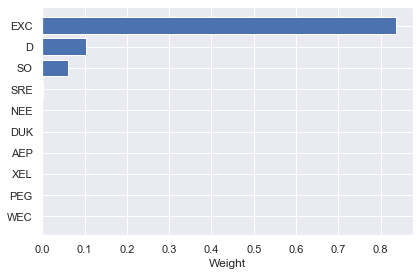

In [120]:

ef_Pred2 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred2 = ef_Pred2.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred2)
ef_Pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 10.6%
Annual volatility: 2.5%
Sharpe Ratio: 3.83


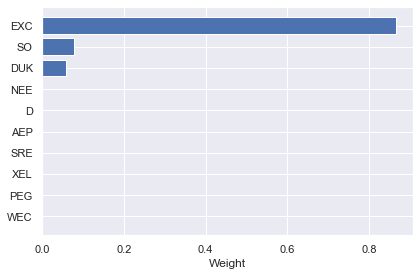

In [121]:


ef_Pred2 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred2.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred2,AV1_Pred2,SR1_Pred2=ef_Pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)





In [122]:

Weight_Pred2= raw_weights_maxsharpe_exp.values()

LISTValue_Pred2= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred2 = pd.DataFrame(hhhhh.T,columns = ['per_Pred2'])



In [123]:


PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred2 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred2'])




# Period2

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_41 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0049
Epoch 2/25
494/494 - 15s - loss: 0.0015
Epoch 3/25
494/494 - 15s - loss: 0.0015
Epoch 4/25
494/494 - 15s - loss: 0.0017
Epoch 5/25
494/494 - 15s - loss: 0.0014
Epoch 6/25
494/494 - 15s - loss: 0.0013
Epoch 7/25
494/494 - 15s - loss: 0.0013
Epoch 8/25

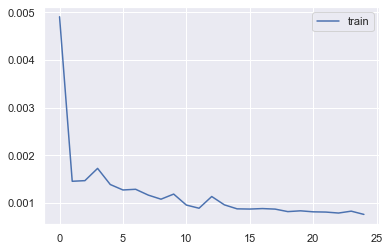

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_43 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0087
Epoch 2/25
494/494 - 15s - loss: 0.0038
Epoch 3/25
494/494 - 15s - loss: 0.0035
Epoch 4/25
494/494 - 14s - loss: 0.0035
Epoch 5/25
494/494 - 14s - loss: 0.0032
Epoch 6/25
494/494 - 14s - loss: 0.0029
Epoch 7/25
494/494 - 15s - loss: 0.0031
Epoch 8/25

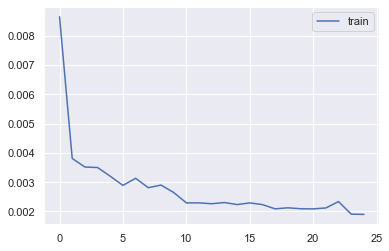

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_45 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0114
Epoch 2/25
494/494 - 14s - loss: 0.0048
Epoch 3/25
494/494 - 14s - loss: 0.0041
Epoch 4/25
494/494 - 15s - loss: 0.0039
Epoch 5/25
494/494 - 14s - loss: 0.0036
Epoch 6/25
494/494 - 14s - loss: 0.0036
Epoch 7/25
494/494 - 15s - loss: 0.0035
Epoch 8/25


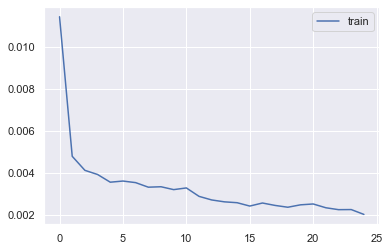

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_47 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0060
Epoch 2/25
494/494 - 15s - loss: 0.0026
Epoch 3/25
494/494 - 18s - loss: 0.0024
Epoch 4/25
494/494 - 16s - loss: 0.0022
Epoch 5/25
494/494 - 15s - loss: 0.0020
Epoch 6/25
494/494 - 15s - loss: 0.0021
Epoch 7/25
494/494 - 15s - loss: 0.0021
Epoch 8/25
4

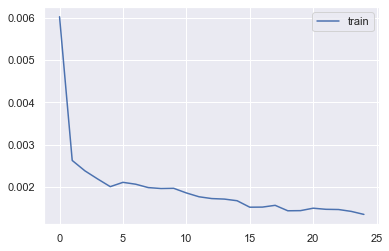

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_49 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 20s - loss: 0.0084
Epoch 2/25
494/494 - 16s - loss: 0.0047
Epoch 3/25
494/494 - 17s - loss: 0.0048
Epoch 4/25
494/494 - 17s - loss: 0.0041
Epoch 5/25
494/494 - 16s - loss: 0.0043
Epoch 6/25
494/494 - 19s - loss: 0.0041
Epoch 7/25
494/494 - 14s - loss: 0.0041
Epoch 8/25

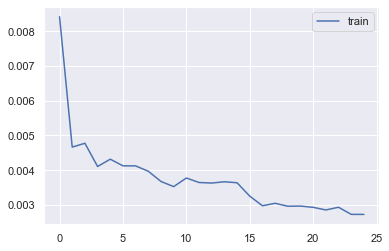

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_51 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 21s - loss: 0.0066
Epoch 2/25
494/494 - 19s - loss: 0.0026
Epoch 3/25
494/494 - 17s - loss: 0.0027
Epoch 4/25
494/494 - 17s - loss: 0.0023
Epoch 5/25
494/494 - 16s - loss: 0.0021
Epoch 6/25
494/494 - 16s - loss: 0.0022
Epoch 7/25
494/494 - 16s - loss: 0.0018
Epoch 8/25

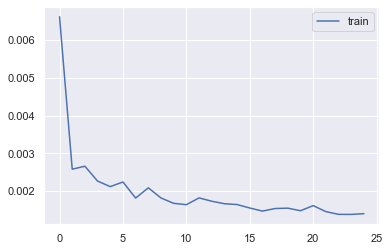

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_53 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 20s - loss: 0.0073
Epoch 2/25
494/494 - 17s - loss: 0.0031
Epoch 3/25
494/494 - 16s - loss: 0.0025
Epoch 4/25
494/494 - 14s - loss: 0.0025
Epoch 5/25
494/494 - 17s - loss: 0.0025
Epoch 6/25
494/494 - 15s - loss: 0.0024
Epoch 7/25
494/494 - 15s - loss: 0.0021
Epoch 8/25

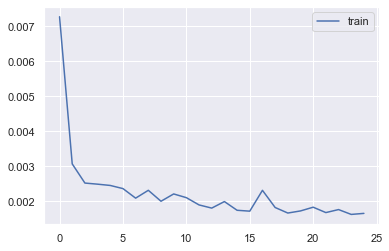

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_55 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0047
Epoch 2/25
494/494 - 16s - loss: 0.0026
Epoch 3/25
494/494 - 18s - loss: 0.0020
Epoch 4/25
494/494 - 18s - loss: 0.0019
Epoch 5/25
494/494 - 16s - loss: 0.0017
Epoch 6/25
494/494 - 15s - loss: 0.0016
Epoch 7/25
494/494 - 15s - loss: 0.0015
Epoch 8/25

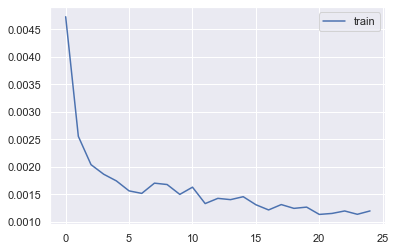

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_57 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0074
Epoch 2/25
494/494 - 14s - loss: 0.0036
Epoch 3/25
494/494 - 15s - loss: 0.0035
Epoch 4/25
494/494 - 15s - loss: 0.0035
Epoch 5/25
494/494 - 14s - loss: 0.0032
Epoch 6/25
494/494 - 16s - loss: 0.0034
Epoch 7/25
494/494 - 15s - loss: 0.0032
Epoch 8/25

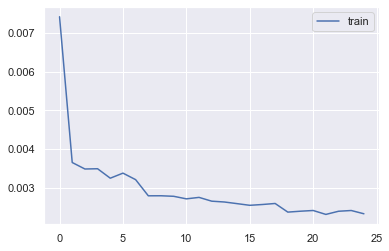

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_59 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0066
Epoch 2/25
494/494 - 14s - loss: 0.0023
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0018
Epoch 5/25
494/494 - 14s - loss: 0.0019
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0017
Epoch 8/25

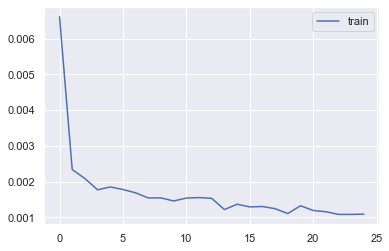

In [124]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+100:L+200,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[100:L+100,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+100:L+200,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [125]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred3 = EfficientFrontier(mu, Sigma)
    ef_Pred3.efficient_return(i)
    vol_ef.append(ef_Pred3.portfolio_performance()[1])

ef_Pred3 = EfficientFrontier(mu, Sigma)
ef_Pred3.min_volatility()
min_vol_ret = ef_Pred3.portfolio_performance()[0]
min_vol_vol = ef_Pred3.portfolio_performance()[1]

ef_Pred3.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred3.portfolio_performance()[0]
max_sharpe_vol = ef_Pred3.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)




Expected annual return: 10.2%
Annual volatility: 1.3%
Sharpe Ratio: 7.23


(0.10226375917922458, 0.01289483537684606, 7.232644423416898)

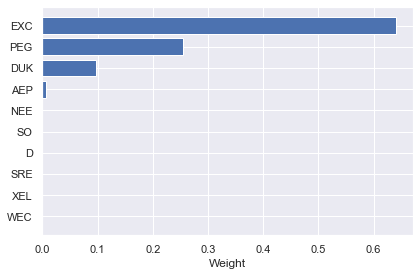

In [126]:


ef_Pred3 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred3 = ef_Pred3.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred3)
ef_Pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 23.1%
Annual volatility: 2.0%
Sharpe Ratio: 11.24


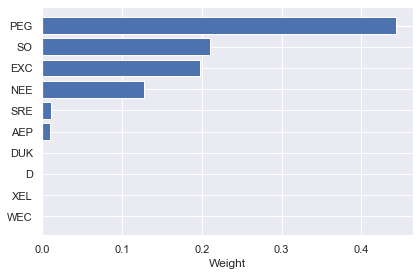

In [127]:

ef_Pred3 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred3.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred3,AV1_Pred3,SR1_Pred3=ef_Pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)







In [128]:


Weight_Pred3= raw_weights_maxsharpe_exp.values()

LISTValue_Pred3= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred3 = pd.DataFrame(hhhhh.T,columns = ['per_Pred3'])



In [129]:


PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred3 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred3'])

# Period3

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_61 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0045
Epoch 2/25
494/494 - 14s - loss: 0.0019
Epoch 3/25
494/494 - 14s - loss: 0.0016
Epoch 4/25
494/494 - 14s - loss: 0.0013
Epoch 5/25
494/494 - 14s - loss: 0.0013
Epoch 6/25
494/494 - 15s - loss: 0.0011
Epoch 7/25
494/494 - 14s - loss: 0.0011
Epoch 8/25

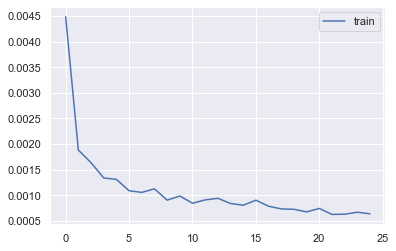

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_63 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0092
Epoch 2/25
494/494 - 15s - loss: 0.0049
Epoch 3/25
494/494 - 15s - loss: 0.0040
Epoch 4/25
494/494 - 15s - loss: 0.0040
Epoch 5/25
494/494 - 15s - loss: 0.0036
Epoch 6/25
494/494 - 15s - loss: 0.0038
Epoch 7/25
494/494 - 15s - loss: 0.0034
Epoch 8/25

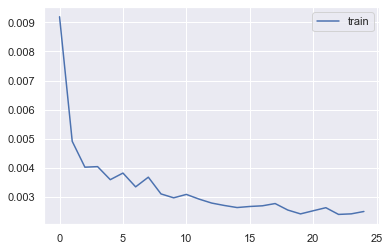

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_65 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0099
Epoch 2/25
494/494 - 15s - loss: 0.0052
Epoch 3/25
494/494 - 15s - loss: 0.0042
Epoch 4/25
494/494 - 15s - loss: 0.0042
Epoch 5/25
494/494 - 14s - loss: 0.0042
Epoch 6/25
494/494 - 16s - loss: 0.0041
Epoch 7/25
494/494 - 17s - loss: 0.0036
Epoch 8/25


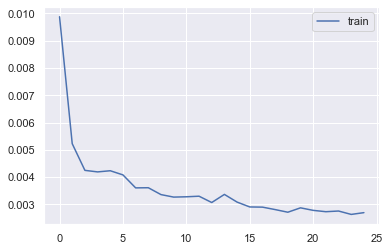

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_67 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0082
Epoch 2/25
494/494 - 16s - loss: 0.0027
Epoch 3/25
494/494 - 18s - loss: 0.0031
Epoch 4/25
494/494 - 15s - loss: 0.0026
Epoch 5/25
494/494 - 17s - loss: 0.0026
Epoch 6/25
494/494 - 15s - loss: 0.0024
Epoch 7/25
494/494 - 15s - loss: 0.0023
Epoch 8/25
4

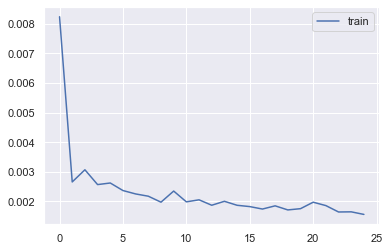

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_69 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0095
Epoch 2/25
494/494 - 14s - loss: 0.0056
Epoch 3/25
494/494 - 14s - loss: 0.0053
Epoch 4/25
494/494 - 14s - loss: 0.0049
Epoch 5/25
494/494 - 14s - loss: 0.0044
Epoch 6/25
494/494 - 14s - loss: 0.0044
Epoch 7/25
494/494 - 14s - loss: 0.0040
Epoch 8/25

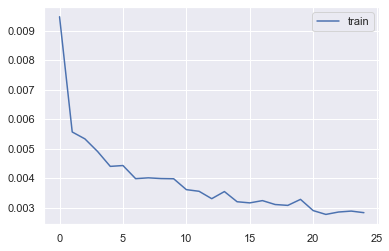

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_71 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0068
Epoch 2/25
494/494 - 14s - loss: 0.0029
Epoch 3/25
494/494 - 14s - loss: 0.0022
Epoch 4/25
494/494 - 14s - loss: 0.0019
Epoch 5/25
494/494 - 14s - loss: 0.0019
Epoch 6/25
494/494 - 14s - loss: 0.0021
Epoch 7/25
494/494 - 14s - loss: 0.0018
Epoch 8/25

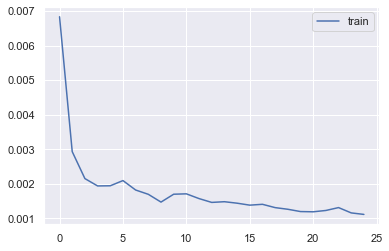

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_73 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0053
Epoch 2/25
494/494 - 15s - loss: 0.0027
Epoch 3/25
494/494 - 15s - loss: 0.0022
Epoch 4/25
494/494 - 16s - loss: 0.0022
Epoch 5/25
494/494 - 16s - loss: 0.0022
Epoch 6/25
494/494 - 17s - loss: 0.0018
Epoch 7/25
494/494 - 16s - loss: 0.0018
Epoch 8/25

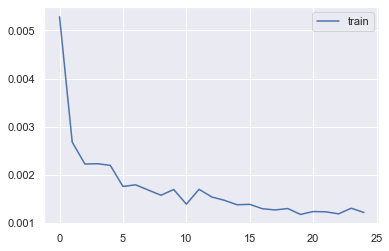

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_75 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0056
Epoch 2/25
494/494 - 17s - loss: 0.0023
Epoch 3/25
494/494 - 19s - loss: 0.0019
Epoch 4/25
494/494 - 15s - loss: 0.0018
Epoch 5/25
494/494 - 14s - loss: 0.0015
Epoch 6/25
494/494 - 14s - loss: 0.0020
Epoch 7/25
494/494 - 14s - loss: 0.0017
Epoch 8/25

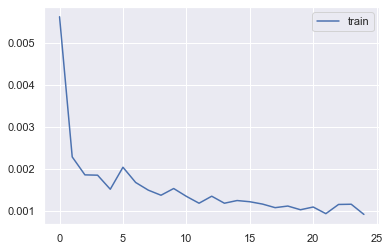

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_77 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0081
Epoch 2/25
494/494 - 14s - loss: 0.0041
Epoch 3/25
494/494 - 14s - loss: 0.0033
Epoch 4/25
494/494 - 14s - loss: 0.0033
Epoch 5/25
494/494 - 14s - loss: 0.0034
Epoch 6/25
494/494 - 15s - loss: 0.0025
Epoch 7/25
494/494 - 15s - loss: 0.0029
Epoch 8/25

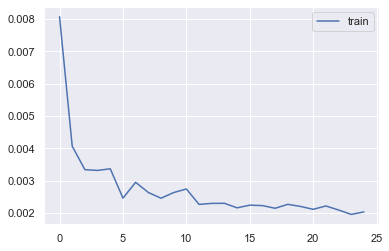

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_79 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0046
Epoch 2/25
494/494 - 16s - loss: 0.0020
Epoch 3/25
494/494 - 16s - loss: 0.0016
Epoch 4/25
494/494 - 17s - loss: 0.0019
Epoch 5/25
494/494 - 16s - loss: 0.0016
Epoch 6/25
494/494 - 17s - loss: 0.0016
Epoch 7/25
494/494 - 16s - loss: 0.0015
Epoch 8/25

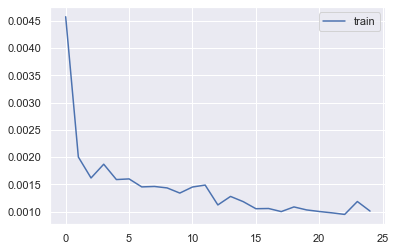

In [130]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+200:L+300,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[200:L+200,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+200:L+300,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [131]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred4 = EfficientFrontier(mu, Sigma)
    ef_Pred4.efficient_return(i)
    vol_ef.append(ef_Pred4.portfolio_performance()[1])

ef_Pred4 = EfficientFrontier(mu, Sigma)
ef_Pred4.min_volatility()
min_vol_ret = ef_Pred4.portfolio_performance()[0]
min_vol_vol = ef_Pred4.portfolio_performance()[1]

ef_Pred4.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred4.portfolio_performance()[0]
max_sharpe_vol = ef_Pred4.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)


Expected annual return: 10.5%
Annual volatility: 4.1%
Sharpe Ratio: 2.36


(0.10515037634564574, 0.04070004974196422, 2.3624142219784283)

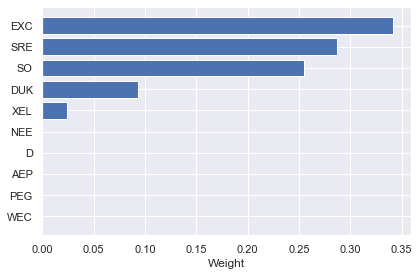

In [132]:


ef_Pred4 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred4 = ef_Pred4.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred4)
ef_Pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 34.8%
Annual volatility: 6.2%
Sharpe Ratio: 5.51


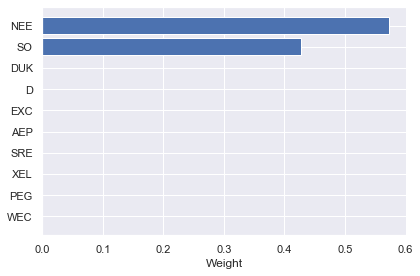

In [133]:



ef_Pred4 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred4.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred4,AV1_Pred4,SR1_Pred4=ef_Pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [134]:

Weight_Pred4= raw_weights_maxsharpe_exp.values()

LISTValue_Pred4= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred4 = pd.DataFrame(hhhhh.T,columns = ['per_Pred4'])



PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred4 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred4'])

# Period4

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_81 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0038
Epoch 2/25
494/494 - 17s - loss: 0.0015
Epoch 3/25
494/494 - 15s - loss: 0.0011
Epoch 4/25
494/494 - 17s - loss: 9.0890e-04
Epoch 5/25
494/494 - 19s - loss: 0.0011
Epoch 6/25
494/494 - 16s - loss: 8.6622e-04
Epoch 7/25
494/494 - 16s - loss: 7.6546e-0

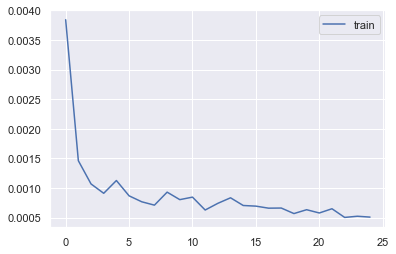

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_83 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0094
Epoch 2/25
494/494 - 18s - loss: 0.0042
Epoch 3/25
494/494 - 16s - loss: 0.0039
Epoch 4/25
494/494 - 16s - loss: 0.0035
Epoch 5/25
494/494 - 15s - loss: 0.0033
Epoch 6/25
494/494 - 15s - loss: 0.0031
Epoch 7/25
494/494 - 14s - loss: 0.0031
Epoch 8/25

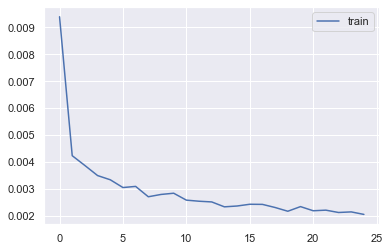

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_85 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0073
Epoch 2/25
494/494 - 14s - loss: 0.0039
Epoch 3/25
494/494 - 14s - loss: 0.0029
Epoch 4/25
494/494 - 14s - loss: 0.0030
Epoch 5/25
494/494 - 14s - loss: 0.0029
Epoch 6/25
494/494 - 14s - loss: 0.0028
Epoch 7/25
494/494 - 14s - loss: 0.0023
Epoch 8/25


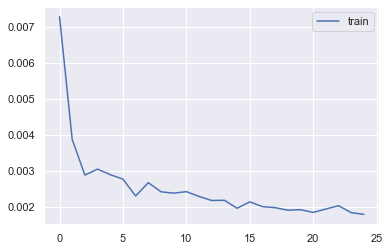

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_87 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0094
Epoch 2/25
494/494 - 16s - loss: 0.0040
Epoch 3/25
494/494 - 16s - loss: 0.0029
Epoch 4/25
494/494 - 16s - loss: 0.0033
Epoch 5/25
494/494 - 16s - loss: 0.0028
Epoch 6/25
494/494 - 16s - loss: 0.0027
Epoch 7/25
494/494 - 17s - loss: 0.0027
Epoch 8/25
4

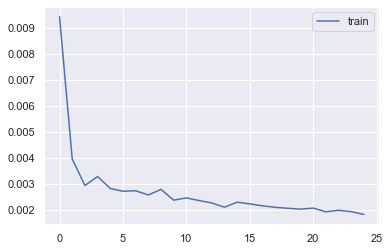

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_89 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0108
Epoch 2/25
494/494 - 14s - loss: 0.0067
Epoch 3/25
494/494 - 14s - loss: 0.0056
Epoch 4/25
494/494 - 14s - loss: 0.0047
Epoch 5/25
494/494 - 14s - loss: 0.0044
Epoch 6/25
494/494 - 14s - loss: 0.0046
Epoch 7/25
494/494 - 14s - loss: 0.0048
Epoch 8/25

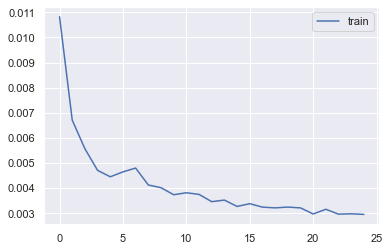

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_91 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0077
Epoch 2/25
494/494 - 14s - loss: 0.0021
Epoch 3/25
494/494 - 15s - loss: 0.0022
Epoch 4/25
494/494 - 15s - loss: 0.0019
Epoch 5/25
494/494 - 15s - loss: 0.0019
Epoch 6/25
494/494 - 15s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0019
Epoch 8/25

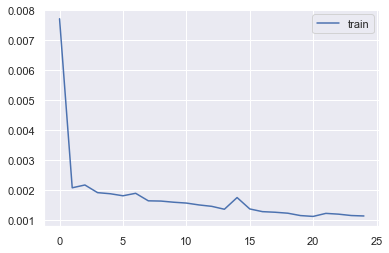

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_93 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0057
Epoch 2/25
494/494 - 14s - loss: 0.0021
Epoch 3/25
494/494 - 14s - loss: 0.0020
Epoch 4/25
494/494 - 15s - loss: 0.0018
Epoch 5/25
494/494 - 14s - loss: 0.0019
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0016
Epoch 8/25

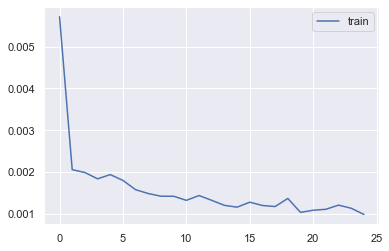

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_95 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0073
Epoch 2/25
494/494 - 14s - loss: 0.0023
Epoch 3/25
494/494 - 15s - loss: 0.0016
Epoch 4/25
494/494 - 14s - loss: 0.0019
Epoch 5/25
494/494 - 14s - loss: 0.0014
Epoch 6/25
494/494 - 14s - loss: 0.0016
Epoch 7/25
494/494 - 14s - loss: 0.0016
Epoch 8/25

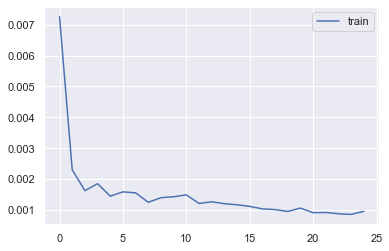

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_97 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0060
Epoch 2/25
494/494 - 14s - loss: 0.0032
Epoch 3/25
494/494 - 17s - loss: 0.0033
Epoch 4/25
494/494 - 15s - loss: 0.0028
Epoch 5/25
494/494 - 14s - loss: 0.0029
Epoch 6/25
494/494 - 14s - loss: 0.0027
Epoch 7/25
494/494 - 14s - loss: 0.0026
Epoch 8/25

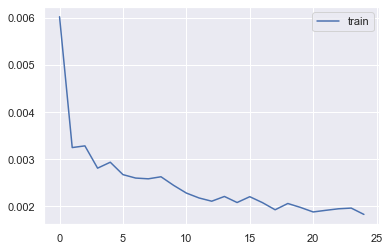

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_99 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0075
Epoch 2/25
494/494 - 14s - loss: 0.0053
Epoch 3/25
494/494 - 15s - loss: 0.0017
Epoch 4/25
494/494 - 14s - loss: 0.0017
Epoch 5/25
494/494 - 14s - loss: 0.0014
Epoch 6/25
494/494 - 14s - loss: 0.0014
Epoch 7/25
494/494 - 14s - loss: 0.0012
Epoch 8/25

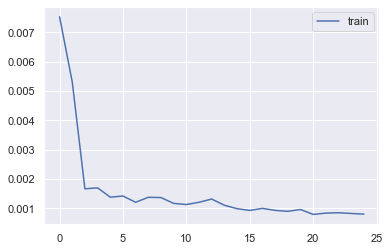

In [135]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+300:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[300:L+300,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+300:L+400,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [138]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred5 = EfficientFrontier(mu, Sigma)
    ef_Pred5.efficient_return(i)
    vol_ef.append(ef_Pred5.portfolio_performance()[1])

ef_Pred5 = EfficientFrontier(mu, Sigma)
ef_Pred5.min_volatility()
min_vol_ret = ef_Pred5.portfolio_performance()[0]
min_vol_vol = ef_Pred5.portfolio_performance()[1]

ef_Pred5.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred5.portfolio_performance()[0]
max_sharpe_vol = ef_Pred5.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)

OptimizationError: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')

In [ ]:



ef_Pred5 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred5 = ef_Pred5.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred5)
ef_Pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [ ]:

ef_Pred5 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred5.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred5,AV1_Pred5,SR1_Pred5=ef_Pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [ ]:

Weight_Pred5= raw_weights_maxsharpe_exp.values()

LISTValue_Pred5= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred5 = pd.DataFrame(hhhhh.T,columns = ['per_Pred5'])



PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred5 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred5'])

# Period5

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_101 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0041
Epoch 2/25
494/494 - 14s - loss: 0.0020
Epoch 3/25
494/494 - 14s - loss: 0.0019
Epoch 4/25
494/494 - 14s - loss: 0.0013
Epoch 5/25
494/494 - 14s - loss: 0.0012
Epoch 6/25
494/494 - 14s - loss: 0.0012
Epoch 7/25
494/494 - 14s - loss: 0.0011
Epoch 8/25

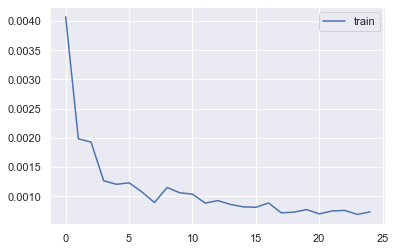

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_102 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_103 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0076
Epoch 2/25
494/494 - 14s - loss: 0.0058
Epoch 3/25
494/494 - 15s - loss: 0.0041
Epoch 4/25
494/494 - 15s - loss: 0.0043
Epoch 5/25
494/494 - 14s - loss: 0.0039
Epoch 6/25
494/494 - 17s - loss: 0.0034
Epoch 7/25
494/494 - 15s - loss: 0.0031
Epoch 8/25

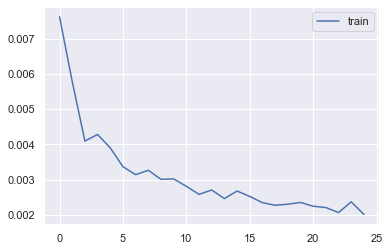

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_105 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0077
Epoch 2/25
494/494 - 14s - loss: 0.0036
Epoch 3/25
494/494 - 14s - loss: 0.0037
Epoch 4/25
494/494 - 14s - loss: 0.0039
Epoch 5/25
494/494 - 14s - loss: 0.0033
Epoch 6/25
494/494 - 14s - loss: 0.0034
Epoch 7/25
494/494 - 15s - loss: 0.0032
Epoch 8/25


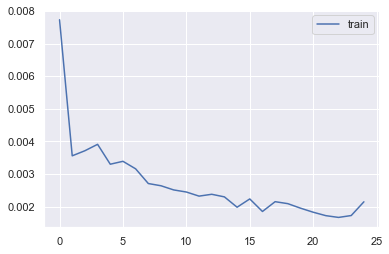

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_107 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0080
Epoch 2/25
494/494 - 14s - loss: 0.0039
Epoch 3/25
494/494 - 14s - loss: 0.0032
Epoch 4/25
494/494 - 14s - loss: 0.0032
Epoch 5/25
494/494 - 14s - loss: 0.0034
Epoch 6/25
494/494 - 14s - loss: 0.0031
Epoch 7/25
494/494 - 14s - loss: 0.0027
Epoch 8/25
4

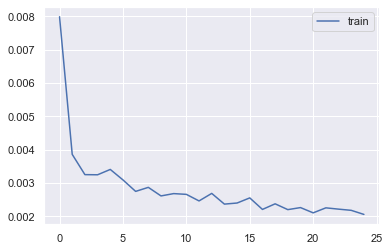

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_109 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0139
Epoch 2/25
494/494 - 14s - loss: 0.0078
Epoch 3/25
494/494 - 14s - loss: 0.0069
Epoch 4/25
494/494 - 14s - loss: 0.0071
Epoch 5/25
494/494 - 14s - loss: 0.0060
Epoch 6/25
494/494 - 14s - loss: 0.0062
Epoch 7/25
494/494 - 14s - loss: 0.0059
Epoch 8/25

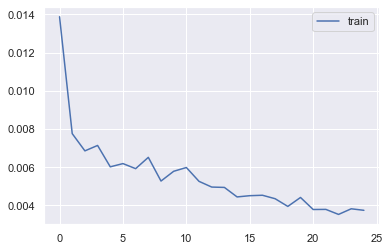

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_110 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_111 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0059
Epoch 2/25
494/494 - 14s - loss: 0.0029
Epoch 3/25
494/494 - 14s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0020
Epoch 5/25
494/494 - 14s - loss: 0.0020
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0018
Epoch 8/25

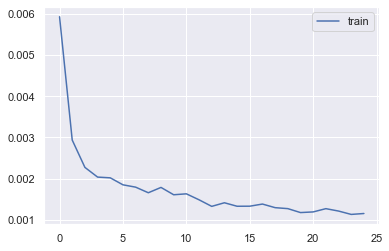

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_113 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0059
Epoch 2/25
494/494 - 14s - loss: 0.0036
Epoch 3/25
494/494 - 14s - loss: 0.0032
Epoch 4/25
494/494 - 14s - loss: 0.0031
Epoch 5/25
494/494 - 14s - loss: 0.0027
Epoch 6/25
494/494 - 16s - loss: 0.0025
Epoch 7/25
494/494 - 17s - loss: 0.0024
Epoch 8/25

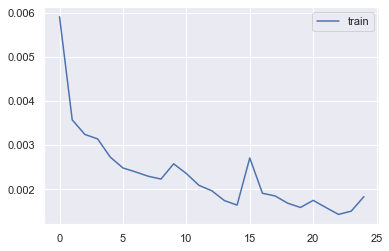

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_115 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0043
Epoch 2/25
494/494 - 14s - loss: 0.0020
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0016
Epoch 5/25
494/494 - 14s - loss: 0.0017
Epoch 6/25
494/494 - 14s - loss: 0.0017
Epoch 7/25
494/494 - 14s - loss: 0.0015
Epoch 8/25

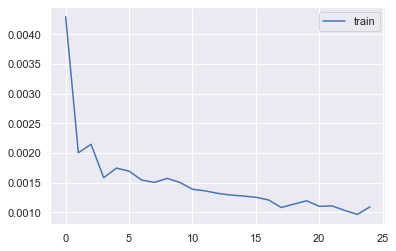

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_117 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0088
Epoch 2/25
494/494 - 14s - loss: 0.0059
Epoch 3/25
494/494 - 15s - loss: 0.0054
Epoch 4/25
494/494 - 14s - loss: 0.0050
Epoch 5/25
494/494 - 14s - loss: 0.0048
Epoch 6/25
494/494 - 14s - loss: 0.0045
Epoch 7/25
494/494 - 14s - loss: 0.0044
Epoch 8/25

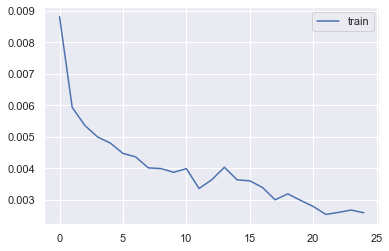

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_118 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_119 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0051
Epoch 2/25
494/494 - 14s - loss: 0.0017
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0015
Epoch 5/25
494/494 - 14s - loss: 0.0015
Epoch 6/25
494/494 - 14s - loss: 0.0013
Epoch 7/25
494/494 - 14s - loss: 0.0016
Epoch 8/25

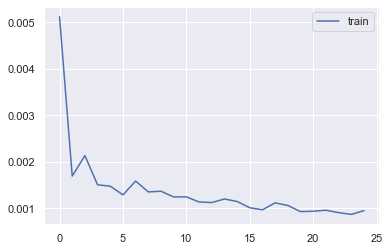

In [139]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+400:L+500,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[400:L+400,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+400:L+500,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [140]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred6 = EfficientFrontier(mu, Sigma)
    ef_Pred6.efficient_return(i)
    vol_ef.append(ef_Pred6.portfolio_performance()[1])

ef_Pred6 = EfficientFrontier(mu, Sigma)
ef_Pred6.min_volatility()
min_vol_ret = ef_Pred6.portfolio_performance()[0]
min_vol_vol = ef_Pred6.portfolio_performance()[1]

ef_Pred6.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred6.portfolio_performance()[0]
max_sharpe_vol = ef_Pred6.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)



Expected annual return: 24.4%
Annual volatility: 4.6%
Sharpe Ratio: 5.14


(0.24375396482924144, 0.04565549174270407, 5.141856014873743)

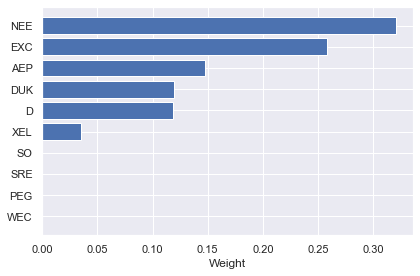

In [141]:


ef_Pred6 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred6 = ef_Pred6.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred6)
ef_Pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)






Expected annual return: 38.7%
Annual volatility: 5.1%
Sharpe Ratio: 7.38


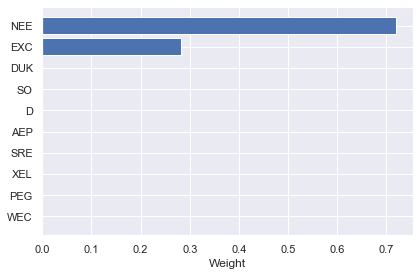

In [142]:

ef_Pred6 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred6.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred6,AV1_Pred6,SR1_Pred6=ef_Pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)




In [143]:

Weight_Pred6= raw_weights_maxsharpe_exp.values()

LISTValue_Pred6= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred6 = pd.DataFrame(hhhhh.T,columns = ['per_Pred6'])



PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred6 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred6'])

# Period6

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_121 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0045
Epoch 2/25
494/494 - 14s - loss: 0.0022
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0015
Epoch 5/25
494/494 - 14s - loss: 0.0014
Epoch 6/25
494/494 - 14s - loss: 0.0013
Epoch 7/25
494/494 - 14s - loss: 0.0012
Epoch 8/25

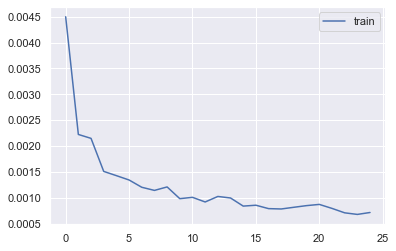

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_123 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0096
Epoch 2/25
494/494 - 14s - loss: 0.0064
Epoch 3/25
494/494 - 14s - loss: 0.0057
Epoch 4/25
494/494 - 14s - loss: 0.0051
Epoch 5/25
494/494 - 14s - loss: 0.0046
Epoch 6/25
494/494 - 15s - loss: 0.0044
Epoch 7/25
494/494 - 17s - loss: 0.0041
Epoch 8/25

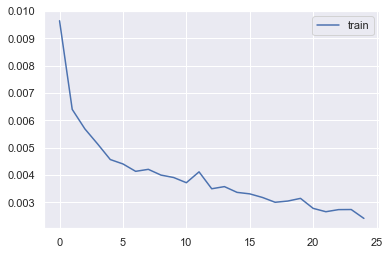

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_125 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0105
Epoch 2/25
494/494 - 14s - loss: 0.0046
Epoch 3/25
494/494 - 14s - loss: 0.0049
Epoch 4/25
494/494 - 14s - loss: 0.0043
Epoch 5/25
494/494 - 14s - loss: 0.0042
Epoch 6/25
494/494 - 14s - loss: 0.0041
Epoch 7/25
494/494 - 14s - loss: 0.0039
Epoch 8/25


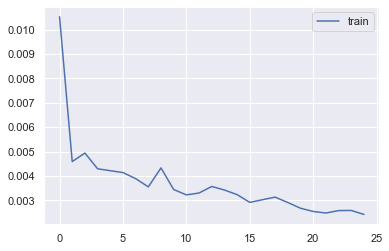

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_127 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0080
Epoch 2/25
494/494 - 14s - loss: 0.0048
Epoch 3/25
494/494 - 14s - loss: 0.0044
Epoch 4/25
494/494 - 15s - loss: 0.0040
Epoch 5/25
494/494 - 18s - loss: 0.0036
Epoch 6/25
494/494 - 14s - loss: 0.0033
Epoch 7/25
494/494 - 15s - loss: 0.0032
Epoch 8/25
4

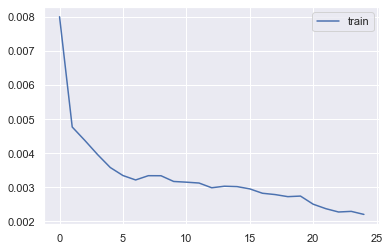

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_129 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0154
Epoch 2/25
494/494 - 14s - loss: 0.0080
Epoch 3/25
494/494 - 14s - loss: 0.0069
Epoch 4/25
494/494 - 14s - loss: 0.0068
Epoch 5/25
494/494 - 14s - loss: 0.0063
Epoch 6/25
494/494 - 14s - loss: 0.0058
Epoch 7/25
494/494 - 15s - loss: 0.0062
Epoch 8/25

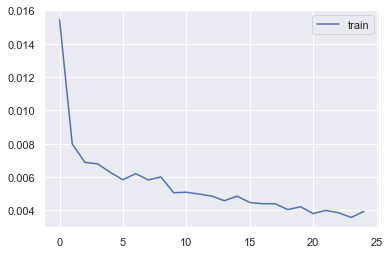

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_131 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0059
Epoch 2/25
494/494 - 14s - loss: 0.0032
Epoch 3/25
494/494 - 14s - loss: 0.0027
Epoch 4/25
494/494 - 14s - loss: 0.0027
Epoch 5/25
494/494 - 16s - loss: 0.0023
Epoch 6/25
494/494 - 18s - loss: 0.0024
Epoch 7/25
494/494 - 18s - loss: 0.0023
Epoch 8/25

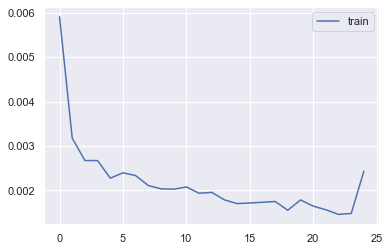

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_133 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0063
Epoch 2/25
494/494 - 14s - loss: 0.0036
Epoch 3/25
494/494 - 17s - loss: 0.0035
Epoch 4/25
494/494 - 16s - loss: 0.0030
Epoch 5/25
494/494 - 14s - loss: 0.0027
Epoch 6/25
494/494 - 14s - loss: 0.0030
Epoch 7/25
494/494 - 14s - loss: 0.0026
Epoch 8/25

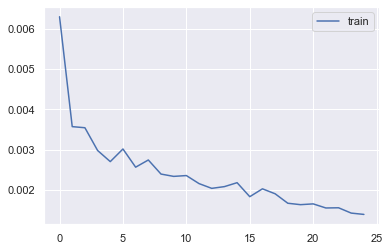

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_135 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0051
Epoch 2/25
494/494 - 15s - loss: 0.0029
Epoch 3/25
494/494 - 16s - loss: 0.0022
Epoch 4/25
494/494 - 16s - loss: 0.0019
Epoch 5/25
494/494 - 17s - loss: 0.0019
Epoch 6/25
494/494 - 15s - loss: 0.0022
Epoch 7/25
494/494 - 15s - loss: 0.0017
Epoch 8/25

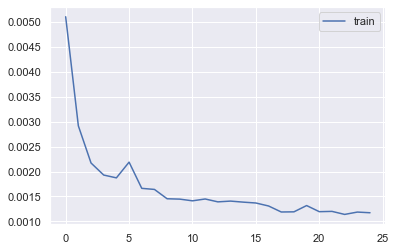

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_137 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0096
Epoch 2/25
494/494 - 15s - loss: 0.0055
Epoch 3/25
494/494 - 15s - loss: 0.0057
Epoch 4/25
494/494 - 15s - loss: 0.0050
Epoch 5/25
494/494 - 15s - loss: 0.0052
Epoch 6/25
494/494 - 15s - loss: 0.0051
Epoch 7/25
494/494 - 15s - loss: 0.0050
Epoch 8/25

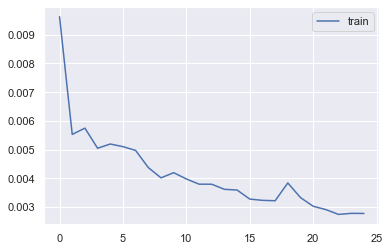

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_139 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0054
Epoch 2/25
494/494 - 20s - loss: 0.0025
Epoch 3/25
494/494 - 16s - loss: 0.0021
Epoch 4/25
494/494 - 15s - loss: 0.0019
Epoch 5/25
494/494 - 18s - loss: 0.0018
Epoch 6/25
494/494 - 17s - loss: 0.0018
Epoch 7/25
494/494 - 17s - loss: 0.0016
Epoch 8/25

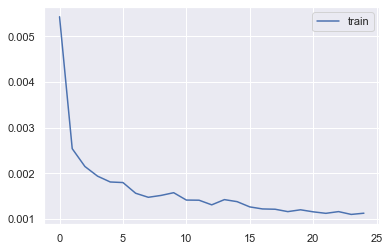

In [144]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+500:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[500:L+500,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+500:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [145]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST['NEE'].pct_change()
DUK_daily_returns = TEST['DUK'].pct_change()

SO_daily_returns = TEST['SO'].pct_change()
D_daily_returns = TEST['D'].pct_change()

EXC_daily_returns = TEST['EXC'].pct_change()
AEP_daily_returns = TEST['AEP'].pct_change()

SRE_daily_returns = TEST['SRE'].pct_change()
XEL_daily_returns = TEST['XEL'].pct_change()

PEG_daily_returns = TEST['PEG'].pct_change()
WEC_daily_returns = TEST['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_Pred7 = EfficientFrontier(mu, Sigma)
    ef_Pred7.efficient_return(i)
    vol_ef.append(ef_Pred7.portfolio_performance()[1])

ef_Pred7 = EfficientFrontier(mu, Sigma)
ef_Pred7.min_volatility()
min_vol_ret = ef_Pred7.portfolio_performance()[0]
min_vol_vol = ef_Pred7.portfolio_performance()[1]

ef_Pred7.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_Pred7.portfolio_performance()[0]
max_sharpe_vol = ef_Pred7.portfolio_performance()[1]


portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)


Expected annual return: 33.3%
Annual volatility: 5.8%
Sharpe Ratio: 5.61


(0.3332926519932918, 0.05783729728801313, 5.606981432386225)

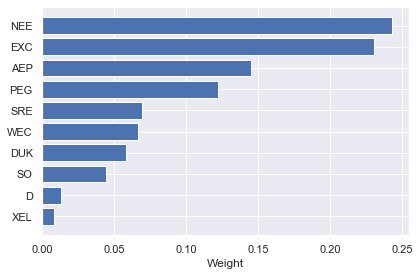

In [146]:



ef_Pred7 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_Pred7 = ef_Pred7.min_volatility()

plot_weights(raw_weights_minvar_exp_Pred7)
ef_Pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)





Expected annual return: 51.2%
Annual volatility: 6.6%
Sharpe Ratio: 7.56


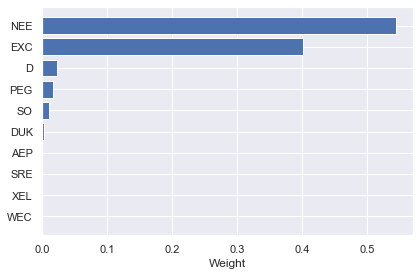

In [147]:



ef_Pred7 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_Pred7.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred7,AV1_Pred7,SR1_Pred7=ef_Pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [148]:

Weight_Pred7= raw_weights_maxsharpe_exp.values()

LISTValue_Pred7= list(WeightPeriod1)

SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

per_Pred7 = pd.DataFrame(hhhhh.T,columns = ['per_Pred7'])



PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

perreal_Pred7 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred7'])

In [251]:


LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
Equ_Pred = np.mat(np.array(LISTEqualWeight))*np.mat(np.array(SUMpredict))

EquPred = pd.DataFrame(Equ_Pred.T,columns = ['Pred'])



,Pred
0,NaN
1,1.002719
2,1.003973
3,1.005345
4,1.005521
...,...
611,1.270237
612,1.282063
613,1.287218
614,1.290395


In [254]:
LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

Equ_actual = np.mat(np.array(PortfolioREAL_cum_returns))*np.mat(np.array(LISTEqualWeight)).T
Equactual = pd.DataFrame(Equ_actual,columns = ['Act'])

,Act
0,NaN
1,1.005914
2,1.018344
3,1.023449
4,1.010779
...,...
611,1.253543
612,1.242815
613,1.240708
614,1.244162


In [256]:
Equactual.fillna(1, inplace=True)
EquPred.fillna(1, inplace=True)

# ETF

In [269]:
ETFWeight = [16.43,8.22,7.38,6.84,4.72,4.70,4.43,4.08,3.4,3.25]


In [270]:
ETFSUMW = sum(ETFWeight)
for i in range(len(ETFWeight)):
    ETFWeight[i] = ETFWeight[i]/ETFSUMW 


In [275]:
ETFWeight

[0.2589440504334121,
 0.12955082742316784,
 0.11631205673758864,
 0.1078014184397163,
 0.0743892828999212,
 0.07407407407407407,
 0.0698187549251379,
 0.06430260047281323,
 0.053585500394011026,
 0.0512214342001576]

In [272]:
ETF_actual = np.mat(np.array(PortfolioREAL_cum_returns))*np.mat(np.array(ETFWeight)).T
ETFactual = pd.DataFrame(ETF_actual,columns = ['ETFAct'])

In [273]:
ETFactual

,ETFAct
0,NaN
1,1.004251
2,1.017216
3,1.024368
4,1.011311
...,...
611,1.380772
612,1.372126
613,1.371754
614,1.374908


# 总结并画图部分

In [162]:
alphaaa = [1]*100
dataper_Pred5 = {'per_Pred5':pd.Series(alphaaa)}
dataperreal_Pred5 = {'PerReal_Pred5':pd.Series(alphaaa)}



perreal_Pred5 = pd.DataFrame(dataperreal_Pred5)
per_Pred5 = pd.DataFrame(dataper_Pred5)

# 预测部分

In [167]:
per_Pred1.fillna(1, inplace=True)
per_Pred2.fillna(1, inplace=True)
per_Pred3.fillna(1, inplace=True)
per_Pred4.fillna(1, inplace=True)
per_Pred5.fillna(1, inplace=True)
per_Pred6.fillna(1, inplace=True)
per_Pred7.fillna(1, inplace=True)

In [186]:

perPred2=per_Pred2.rename(columns={'per_Pred2':'Predict'})
perPred3=per_Pred3.rename(columns={'per_Pred3':'Predict'})
perPred4=per_Pred4.rename(columns={'per_Pred4':'Predict'})
perPred5=per_Pred5.rename(columns={'per_Pred5':'Predict'})
perPred6=per_Pred6.rename(columns={'per_Pred6':'Predict'})
perPred7=per_Pred7.rename(columns={'per_Pred7':'Predict'})


In [218]:
frames = [perPred2, 
          (perPred2.iloc[-1])*perPred3, 
          ((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4, 
          (((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5, 
          ((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6,
          (((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6.iloc[-1])*perPred7]



         

In [219]:
perPred5

,Predict
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


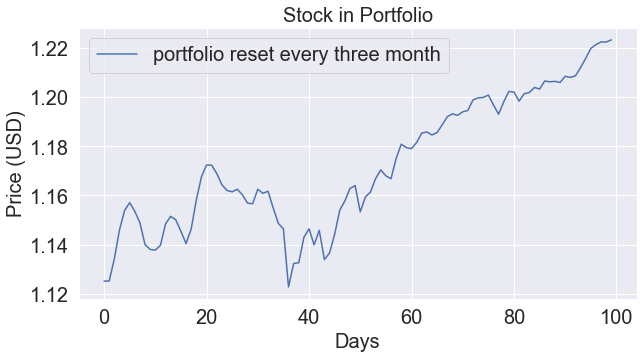

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot((perPred3.iloc[-1])*perPred4)


plt.legend(['portfolio reset every three month','Buy and Hold'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

In [220]:
PredictResult = pd.concat(frames,ignore_index=True)

In [190]:
PredictResult

,Predict
0,1.000000
1,1.001648
2,1.001879
3,1.002842
4,1.002692
...,...
611,1.232793
612,1.241527
613,1.244281
614,1.248495


In [211]:
per_Pred1

,per_Pred1
0,1.000000
1,1.003880
2,1.004634
3,1.006593
4,1.005934
...,...
611,1.470665
612,1.488991
613,1.498676
614,1.497836


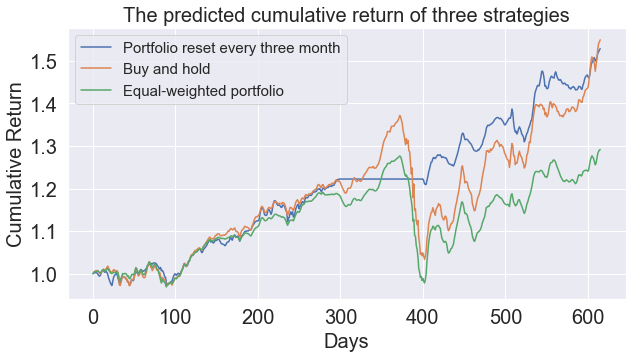

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(PredictResult)
plt.plot(per_Pred1)
plt.plot(EquPred)

plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio'], loc='upper left', fontsize=15)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The predicted cumulative return of three strategies', fontsize=20)
plt.show()

# 实际部分

In [191]:
perreal_Pred1.fillna(1, inplace=True)
perreal_Pred2.fillna(1, inplace=True)
perreal_Pred3.fillna(1, inplace=True)
perreal_Pred4.fillna(1, inplace=True)
perreal_Pred5.fillna(1, inplace=True)
perreal_Pred6.fillna(1, inplace=True)
perreal_Pred7.fillna(1, inplace=True)

In [192]:
perreal_Pred1

,PerReal_Pred1
0,1.000000
1,1.003579
2,1.013754
3,1.020732
4,1.011417
...,...
611,1.512440
612,1.504118
613,1.503572
614,1.505366


In [203]:

perrealPred2=perreal_Pred2.rename(columns={'PerReal_Pred2':'Actual'})
perrealPred3=perreal_Pred3.rename(columns={'PerReal_Pred3':'Actual'})

perrealPred4=perreal_Pred4.rename(columns={'PerReal_Pred4':'Actual'})
perrealPred5=perreal_Pred5.rename(columns={'PerReal_Pred5':'Actual'})

perrealPred6=perreal_Pred6.rename(columns={'PerReal_Pred6':'Actual'})
perrealPred7=perreal_Pred7.rename(columns={'PerReal_Pred7':'Actual'})

In [222]:
framesReal = [perrealPred2, 
          (perrealPred2.iloc[-1])*perrealPred3, 
          ((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4, 
          (((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5, 
          ((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6, 
          (((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6.iloc[-1])*perrealPred7]
         

In [223]:
perrealPred3

,Actual
0,1.000000
1,1.002241
2,1.006986
3,1.034543
4,1.030299
...,...
95,1.168661
96,1.181231
97,1.176612
98,1.170723


In [224]:
ActualResult = pd.concat(framesReal,ignore_index=True)

In [225]:
ActualResult

,Actual
0,1.000000
1,1.003579
2,1.013754
3,1.020732
4,1.011417
...,...
611,1.556691
612,1.547233
613,1.544354
614,1.545978


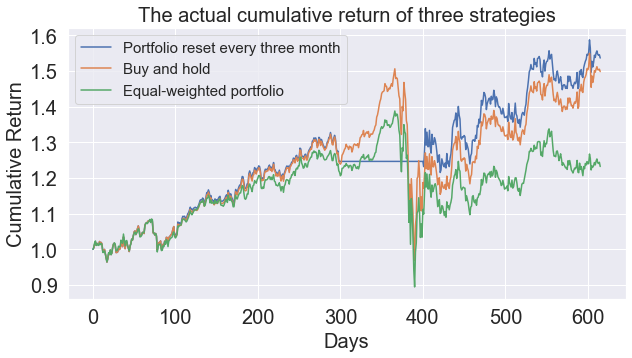

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(ActualResult)
plt.plot(perreal_Pred1)
plt.plot(Equactual)


plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio'], loc='upper left', fontsize=15)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The actual cumulative return of three strategies', fontsize=20)
plt.show()

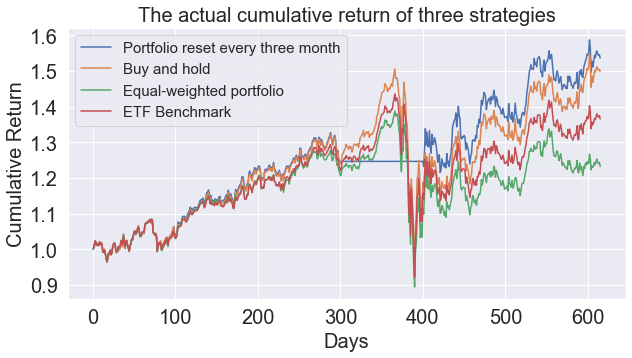

In [274]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(ActualResult)
plt.plot(perreal_Pred1)
plt.plot(Equactual)
plt.plot(ETFactual)


plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio','ETF Benchmark'], loc='upper left', fontsize=15)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The actual cumulative return of three strategies', fontsize=20)
plt.show()

In [232]:
print('Weight_Pred7')
print(Weight_Pred7)
print('Weight_Pred6')
print(Weight_Pred6)
print('Weight_Pred4')
print(Weight_Pred4)
print('Weight_Pred3')
print(Weight_Pred3)
print('Weight_Pred2')
print(Weight_Pred2)
print('Weight_Pred1')
print(Weight_Pred1)

Weight_Pred7
odict_values([0.5443005143559108, 0.003008852417412, 0.0098887266688143, 0.0233622627380626, 0.4022363460926285, 0.0, 0.0, 0.0, 0.0172032977271719, 0.0])
Weight_Pred6
odict_values([0.7185495863758345, 0.0, 0.0, 0.0, 0.2814504136241656, 0.0, 0.0, 0.0, 0.0, 0.0])
Weight_Pred4
odict_values([0.5729859253232473, 0.0, 0.4270140746767525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
Weight_Pred3
odict_values([0.1277415750507625, 0.0, 0.2102703942407445, 0.0, 0.1978039853044366, 0.0096087949623119, 0.0114532986888629, 0.0, 0.4431219517528815, 0.0])
Weight_Pred2
odict_values([0.0, 0.058459195854336, 0.0763555979655233, 0.0, 0.8651852061801407, 0.0, 0.0, 0.0, 0.0, 0.0])
Weight_Pred1
odict_values([0.4756688788448108, 0.0, 0.0, 0.0, 0.1328426283532313, 0.322760518536026, 0.068727974265932, 0.0, 0.0, 0.0])


In [ ]:
Weight_Pred6


In [262]:
raw_weights_maxsharpe_exp = ef_Pred5.max_sharpe(risk_free_rate=0.009)

OptimizationError: Please check your objectives/constraints or use a different solver.